### Edgar Moises Hernandez-Gonzalez
#### 12/05/20
#### Regresion con MLP para predecir el precio de casas de Boston

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [0]:
# escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')
              #metrics=['mae']

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32,
                    validation_data=(x_test,y_test), verbose=2)

Train on 404 samples, validate on 102 samples
Epoch 1/100
 - 0s - loss: 536.7275 - val_loss: 528.2682
Epoch 2/100
 - 0s - loss: 469.4591 - val_loss: 451.0299
Epoch 3/100
 - 0s - loss: 385.8780 - val_loss: 349.3319
Epoch 4/100
 - 0s - loss: 277.5162 - val_loss: 229.4264
Epoch 5/100
 - 0s - loss: 168.5969 - val_loss: 125.9089
Epoch 6/100
 - 0s - loss: 94.6420 - val_loss: 76.2335
Epoch 7/100
 - 0s - loss: 64.5479 - val_loss: 56.2191
Epoch 8/100
 - 0s - loss: 47.4547 - val_loss: 42.8834
Epoch 9/100
 - 0s - loss: 36.2514 - val_loss: 34.7033
Epoch 10/100
 - 0s - loss: 29.1302 - val_loss: 30.0419
Epoch 11/100
 - 0s - loss: 25.4077 - val_loss: 27.2214
Epoch 12/100
 - 0s - loss: 22.7617 - val_loss: 25.5200
Epoch 13/100
 - 0s - loss: 21.3166 - val_loss: 24.3732
Epoch 14/100
 - 0s - loss: 19.8970 - val_loss: 23.6744
Epoch 15/100
 - 0s - loss: 18.7737 - val_loss: 22.8194
Epoch 16/100
 - 0s - loss: 17.8868 - val_loss: 22.8055
Epoch 17/100
 - 0s - loss: 17.0054 - val_loss: 22.5464
Epoch 18/100
 - 0s

In [0]:
test_loss = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)

Test loss: 19.811579685585173


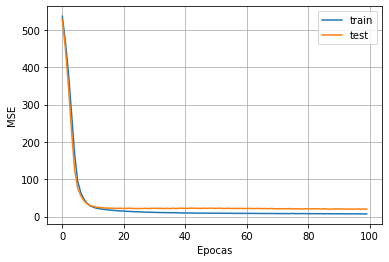

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('MSE')
plt.legend(['train', 'test'])
plt.show()

In [0]:
predicciones = model.predict(x_test)

In [0]:
df_y_test = pd.DataFrame(y_test, columns=['y_test'])
df_pred = pd.DataFrame(predicciones, columns=['predicciones'])
comparar = pd.concat([df_y_test, df_pred], axis=1)
comparar

,y_test,predicciones
0,7.2,8.082804
1,18.8,17.835087
2,19.0,21.928883
3,27.0,32.885246
4,22.2,25.726919
...,...,...
97,21.9,49.637650
98,24.1,27.344822
99,50.0,47.702839
100,26.7,31.702402


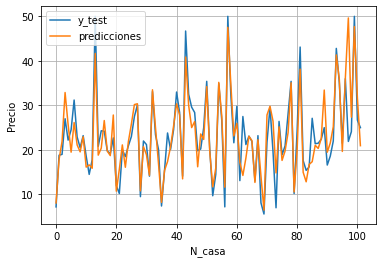

In [0]:
plt.plot(y_test)
plt.plot(predicciones)
plt.grid()
plt.xlabel('N_casa')
plt.ylabel('Precio')
plt.legend(['y_test', 'predicciones'])
plt.show()